<BR>
<BR>
<BR>
<BR>
<BR>
   
                                          
                                          
                                          
                                          
                                          
#                              One Naive Bayes Model in Predicting Obesity Risk




##                                                        Gladys Murage

##                              College of Business, Engineering, and  Technology, National University

##                                         DDS8555 v1: PREDICTIVE ANALYSIS(3602869492)

##                                                        Dr MOHAMED NABEEL

##                                                            April 06, 2025


<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>

Naive Bayes Accuracy: 0.5907996146435452
                     precision    recall  f1-score   support

Insufficient_Weight       0.56      0.75      0.64       524
      Normal_Weight       0.52      0.20      0.29       626
     Obesity_Type_I       0.33      0.42      0.37       543
    Obesity_Type_II       0.53      0.97      0.69       657
   Obesity_Type_III       0.96      1.00      0.98       804
 Overweight_Level_I       0.63      0.26      0.37       484
Overweight_Level_II       0.49      0.29      0.36       514

           accuracy                           0.59      4152
          macro avg       0.58      0.55      0.53      4152
       weighted avg       0.60      0.59      0.56      4152



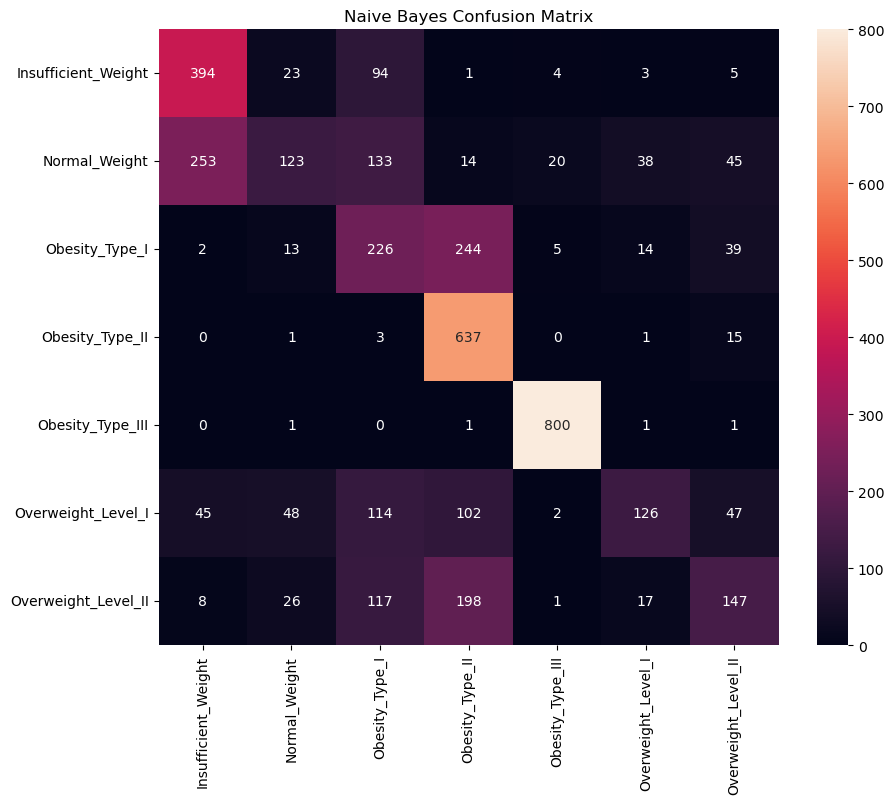


Top Predictive Features per Class:

Class Insufficient_Weight:
Weight: 1.3255
Age: 0.7715
CH2O: 0.4372
family_history_with_overweight_yes: 0.3743
family_history_with_overweight_no: 0.3743

Class Normal_Weight:
Weight: 0.8830
Age: 0.5139
CH2O: 0.3353
Height: 0.3346
family_history_with_overweight_yes: 0.2192

Class Obesity_Type_I:
FCVC: 0.5830
NCP: 0.4056
Weight: 0.2861
Age: 0.2284
CALC_no: 0.2118

Class Obesity_Type_II:
Weight: 1.1817
Height: 0.9478
Age: 0.7002
Gender_Female: 0.4772
Gender_Male: 0.4772

Class Obesity_Type_III:
Weight: 1.2462
FCVC: 1.1104
FAF: 0.5528
CH2O: 0.5294
Gender_Female: 0.5191

Class Overweight_Level_I:
Weight: 0.4017
NCP: 0.3012
FCVC: 0.2838
Height: 0.1498
FAF: 0.1456

Class Overweight_Level_II:
Age: 0.4057
FCVC: 0.3440
NCP: 0.2077
CALC_Sometimes: 0.1982
Gender_Female: 0.1803


In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
train = pd.read_csv('Otrain.csv')
test = pd.read_csv('Otest.csv')
sample_sub = pd.read_csv('Osample_submission.csv')

# Prepare features and target
X_train = train.drop('NObeyesdad', axis=1)
y_train = train['NObeyesdad']
X_test = test.copy()  # Assuming test doesn't have target column

# Identify column types
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Process training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Encode target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Initialize and train Naive Bayes model
nb = GaussianNB()
# Remove .toarray() since X_train_processed is already a dense array
nb.fit(X_train_processed, y_train_encoded)  

# Create validation set
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Process validation data
X_val_processed = preprocessor.transform(X_val)
y_val_encoded = le.transform(y_val)

# Evaluate on validation set
# Remove .toarray() here as well
val_preds = le.inverse_transform(nb.predict(X_val_processed))
print("Naive Bayes Accuracy:", accuracy_score(y_val, val_preds))
print(classification_report(y_val, val_preds))

# Confusion matrix
cm = confusion_matrix(y_val, val_preds, labels=le.classes_)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Naive Bayes Confusion Matrix')
plt.savefig('NB_Confusion_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate submission file
# Remove .toarray() here too
test_preds = le.inverse_transform(nb.predict(X_test_processed))
submission = sample_sub.copy()
submission['NObeyesdad'] = test_preds
submission.to_csv("NaiveBayes_submission.csv", index=False)

# Feature importance (partial dependence)
print("\nTop Predictive Features per Class:")
for i, class_name in enumerate(le.classes_):
    print(f"\nClass {class_name}:")
    # Get mean values for this class
    class_mean = nb.theta_[i]
    # Compare to overall mean
    global_mean = nb.theta_.mean(axis=0)
    # Get most distinctive features
    diff = np.abs(class_mean - global_mean)
    top_indices = np.argsort(diff)[-5:][::-1]  # Top 5 features
    feature_names = (numerical_cols + 
                    list(preprocessor.named_transformers_['cat']
                        .get_feature_names_out(categorical_cols)))
    for idx in top_indices:
        print(f"{feature_names[idx]}: {diff[idx]:.4f}")

# 1. Overall Model Performance
## Accuracy: 0.5908. Only 59% of the predictions were correct, significantly worse than LDA (83%) or one  multinomial regression which had an 87% accuracy

## Macro avg F1-score: 0.53. shows that  the average class performance is poor.

## Weighted avg F1-score: 0.56 .Also low, considering class imbalances.

# 2. Class Specific Performance
## Class	             Precision Recall   F1-score   Support
#### Insufficient_Weight	0.56	0.75	0.64	    524
#### Normal_Weight	        0.52	0.20	0.29	    626
#### Obesity_Type_I	        0.33	0.42	0.37	    543
#### Obesity_Type_II	    0.53	0.97	0.69	    657
#### Obesity_Type_III	    0.96	1.00	0.98	    804
#### Overweight_Level_I	    0.63	0.26	0.37	    484
#### Overweight_Level_II	0.49	0.29	0.36	    514

# 3. Observations
## 1. Strong bias toward certain classes:

a. Obesity_Type_III has perfect recall and high precision meaning that the model is overconfident on that class.

b. Obesity_Type_II is also handled well in terms of recall (0.97), but others are misclassified into it.

## 2. Poor classification for Normal_Weight and Overweights:

a. Normal_Weight has only 20% recall and is often mis-classified as other categories.

b. Overweight_Level_I and II are often confused with each other or with Obesity_Type_I/II

## 3. Insufficient_Weight has a high recall (0.75) but moderate precision (0.56). 394 correct vs. 253 misclassified as Normal_Weight

# 4. Confusion Matrix Interpretation
The model struggles to distinguish adjacent weight classes. There is severity confusion and assymetric errors:
1. Normal_Weight is scattered everywhere: huge confusion with Insufficient_Weight, Obesity_Type_I, and Overweight categories.

2. Obesity_Type_I is split almost evenly between itself and Obesity_Type_II.

3. Overweight_Level_I and Overweight_Level_II have significant overlap with Obesity classes.

4. Obesity_Type_III is almost perfectly predicted, suggesting very distinctive features.

# 5. Why is Naive Bayes under-performing?
1. Naive Bayes assumes feature independence, which is likely violated in this data set.

2, It is a linear, simple model, and does not handle overlapping class distributions well.

3. Complex relationships e.g. interaction terms aren't modeled.

4. Likely high variance and correlation among features, which LDA handles better through covariance matrices.

# 6. Recommendations
1. Avoid using NB as a final model in this context; it is too simple.

2. Stick with LDA, QDA, or SVM, or try tree-based models (Random Forest, XGBoost).

3. Use PCA to decorrelate features before NB.

4. Try GaussianNB with manually transformed features.

# 7. Summary
## Business Implications
1. Naive Bayes model is reliable for  extreme obesity detection (Types II/III)

2. The model is unreliable for precise weight categorization in normal/overweight ranges

## Use Case: Best suited for initial screening rather than clinical diagnosis

## Conclusion: The model shows potential but requires refinement for balanced performance across all classes. 